In [535]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [536]:
data_10_in = pd.read_csv('dados_senoide_10hz.csv')
# data_100_in = pd.read_csv('dados_senoide_100hz.csv')
data_1_in = pd.read_csv('dados_senoide_1hz.csv')
data_01_in = pd.read_csv('dados_senoide_0.1hz.csv')

# data_rpm = pd.read_csv('dados_rpm_100hz.csv')
# data['Tempo'] = [float(x)*10**-6 for x in data['Tempo']]

# amostras = data_1_in['tensao'].values
# num_amostras = len(amostras)


In [537]:
data_10_out = pd.read_csv('dados_rpm_10hz.csv')
resposta = data_10_out['rpm']
# data_100_out = pd.read_csv('dados_rpm_100hz.csv')
# data_01_out = pd.read_csv('dados_rpm_0.1hz.csv')

amostras = data_10_in['tensao'].values
num_amostras = len(amostras)

In [538]:
from scipy.signal import butter, filtfilt

freq_de_corte = 0.1 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada = resposta_filtrada.values.flatten()

In [539]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 10
print(f"Frequência de amostragem estimada: {Fs} Hz")


Frequência de amostragem estimada: 1458.0 Hz


In [540]:
# Gerar o vetor de tempo
# Gerar o vetor de tempo
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

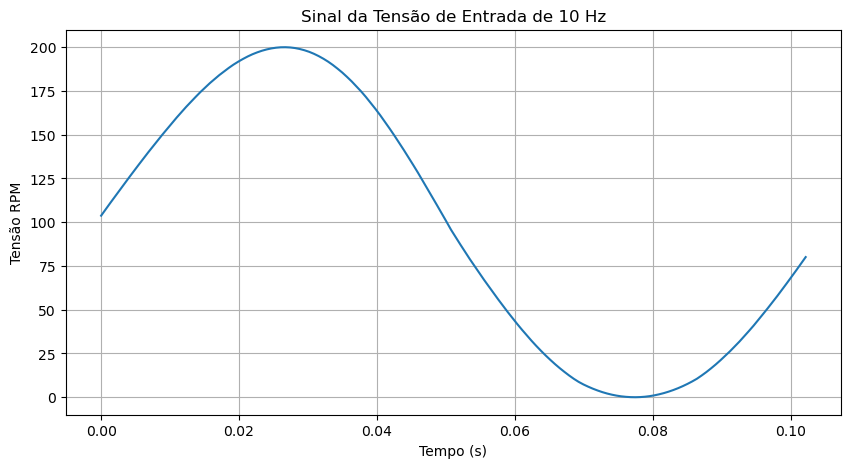

In [541]:
import matplotlib.pyplot as plt


# Plotar o gráfico
plt.figure(figsize=(10,5))
plt.plot(t.iloc[:150], data_10_in['tensao'].iloc[:150])
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão RPM')
plt.title('Sinal da Tensão de Entrada de 10 Hz')
plt.grid(True)
plt.show()


In [542]:
# Encontrar os índices dos picos positivos da senoide
peaks_out, _ = find_peaks(resposta_filtrada)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo_out = np.mean(np.diff(peaks_out))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs_out = num_amostras_por_ciclo_out * 10
print(f"Frequência de amostragem estimada: {Fs_out} Hz")

Frequência de amostragem estimada: 997.8431372549019 Hz


In [543]:
# Gerar o vetor de tempo
num_amostras = len(resposta_filtrada)

t_out = np.arange(0, num_amostras / Fs, 1 / Fs)
t_out = np.array(t_out)
t_out = pd.DataFrame(t_out)

In [544]:
resposta_filtrada = pd.DataFrame(resposta_filtrada)

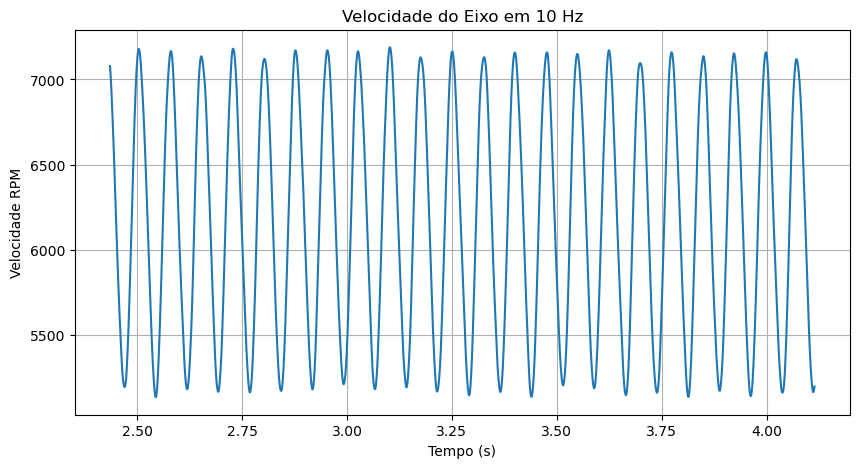

In [551]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t_out.iloc[3550:6000], resposta_filtrada.iloc[3550:6000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()